In [11]:
import os
from kalshi import auth, constants, utils
from kalshi.rest import exchange, market, portfolio
from dotenv import load_dotenv
import numpy as np
import pandas as pd

constants.use_demo() # or constants.use_prod()

# Provide your credentials here
KALSHI_ACCESS_KEY = os.getenv("DEMO_KEYID")
KALSHI_PRIVATE_KEY_PATH = os.getenv("DEMO_KEYFILE")

auth.set_key(KALSHI_ACCESS_KEY, KALSHI_PRIVATE_KEY_PATH)

status = exchange.GetExchangeStatus()
status


{'exchange_active': True, 'trading_active': True}

## Events, markets, trades

In [35]:
# Discover markets
mkts = market.GetMarkets(limit=50)
print(len(mkts.get("markets", [])), list(mkts.keys()))
print(mkts.get("markets", [])[0])


50 ['markets', 'cursor']
{'ticker': 'KXSPOTIFYGLOBALD-25SEP03-SEA', 'event_ticker': 'KXSPOTIFYGLOBALD-25SEP03', 'market_type': 'binary', 'title': 'Top Global Song on Spotify on Sep 3, 2025?', 'subtitle': ':: Lady Gaga', 'yes_sub_title': 'The Dead Dance', 'no_sub_title': 'The Dead Dance', 'open_time': '2025-09-03T23:45:18Z', 'close_time': '2025-09-04T03:59:00Z', 'expected_expiration_time': '2025-09-17T14:00:00Z', 'expiration_time': '2025-09-17T14:00:00Z', 'latest_expiration_time': '2025-09-17T14:00:00Z', 'settlement_timer_seconds': 300, 'status': 'active', 'response_price_units': 'usd_cent', 'notional_value': 100, 'notional_value_dollars': [0, 0], 'yes_bid': 0, 'yes_bid_dollars': [0, 0], 'yes_ask': 9, 'yes_ask_dollars': [0, 0], 'no_bid': 91, 'no_bid_dollars': [0, 0], 'no_ask': 100, 'no_ask_dollars': [0, 0], 'last_price': 0, 'last_price_dollars': [0, 0], 'previous_yes_bid': 0, 'previous_yes_bid_dollars': [0, 0], 'previous_yes_ask': 0, 'previous_yes_ask_dollars': [0, 0], 'previous_price':

In [2]:
# Get event information
event_ticker = "KXPRESNOMD-28"
evt = market.GetEvent(event_ticker=event_ticker)
evt

{'event': {'event_ticker': 'KXPRESNOMD-28',
  'series_ticker': 'KXPRESNOMD',
  'sub_title': 'In 2028',
  'title': 'Who will be the Democratic nominee in 2028?',
  'collateral_return_type': 'MECNET',
  'mutually_exclusive': True,
  'category': 'Elections',
  'price_level_structure': 'linear_cent'},
 'markets': [{'ticker': 'KXPRESNOMD-28-KH',
   'event_ticker': 'KXPRESNOMD-28',
   'market_type': 'binary',
   'title': '',
   'subtitle': '',
   'yes_sub_title': 'Kamala Harris',
   'no_sub_title': 'Kamala Harris',
   'open_time': '2024-12-10T03:33:22Z',
   'close_time': '2028-11-07T15:00:00Z',
   'expected_expiration_time': '2028-11-07T15:00:00Z',
   'expiration_time': '2028-11-07T15:00:00Z',
   'latest_expiration_time': '2028-11-07T15:00:00Z',
   'settlement_timer_seconds': 14,
   'status': 'active',
   'response_price_units': 'usd_cent',
   'notional_value': 100,
   'notional_value_dollars': '1.0000',
   'yes_bid': 4,
   'yes_bid_dollars': '0.0400',
   'yes_ask': 5,
   'yes_ask_dollars': 

In [14]:
market_ticker = "KXPRESNOMD-28-GN"
from time import time

# Get trades from last WEEK
trades = market.GetTrades(
    ticker=market_ticker,
    min_ts=int(time()) - 7* 24 * 3600,
    max_ts=int(time()),
    limit=1000,
)
len(trades.get("trades", [])), list(trades.keys())

(31, ['trades', 'cursor'])

In [15]:
trades["trades"][0]

{'trade_id': '6c5e32e8-6c14-7b06-fe2a-cd8300a4a8ab',
 'ticker': 'KXPRESNOMD-28-GN',
 'count': 10,
 'created_time': '2025-09-02T22:17:08.638707Z',
 'yes_price': 33,
 'no_price': 67,
 'taker_side': 'no'}

In [16]:
trades_df = pd.DataFrame(trades["trades"])
utils.calculate_volume_stats(trades_df)

{'yes_taker_volume': np.int64(2798),
 'no_taker_volume': np.int64(175),
 'total_volume': np.int64(2973),
 'yes_taker_percentage': np.float64(94.1136898755466),
 'no_taker_percentage': np.float64(5.886310124453415),
 'yes_taker_dollar_volume': np.float64(894.97),
 'no_taker_dollar_volume': np.float64(119.2),
 'total_dollar_volume': np.float64(1014.1700000000001),
 'yes_dollar_percentage': np.float64(88.24654643698788),
 'no_dollar_percentage': np.float64(11.753453563012117)}

In [18]:
utils.calculate_vwap(trades_df)

np.float64(31.98015472586613)

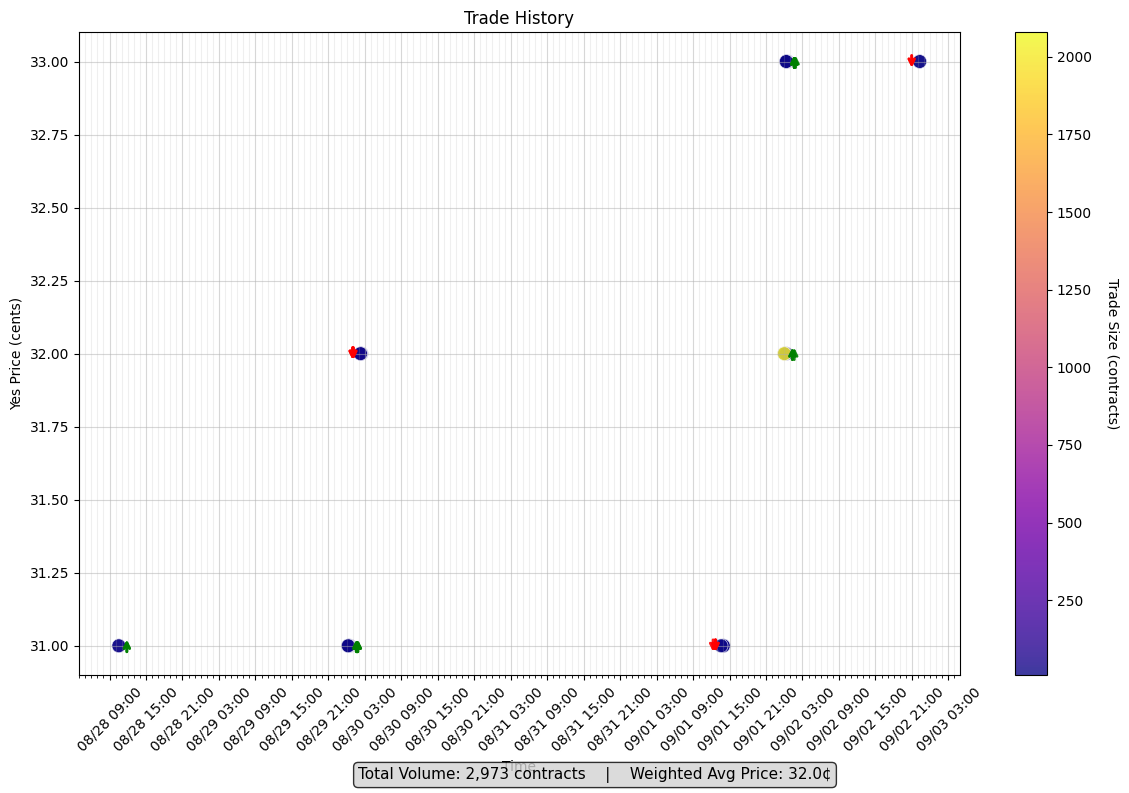

In [19]:
utils.plot_trades(trades_df)

## Order Book

In [20]:
# Get market order book
order_book = market.GetMarketOrderbook(ticker=market_ticker)
order_book


{'orderbook': {'yes': [[1, 1049169],
   [2, 152278],
   [3, 28512],
   [4, 30942],
   [5, 21051],
   [6, 6812],
   [7, 64],
   [8, 3027],
   [9, 796],
   [10, 4308],
   [11, 3893],
   [12, 120],
   [13, 68],
   [14, 432],
   [15, 140],
   [16, 10],
   [17, 50],
   [18, 185],
   [19, 5000],
   [20, 92],
   [21, 250],
   [22, 6],
   [23, 200],
   [25, 2338],
   [26, 14122],
   [27, 5373],
   [28, 12125],
   [29, 69854],
   [30, 23084],
   [31, 3931],
   [32, 3720]],
  'no': [[1, 1150069],
   [2, 200999],
   [3, 200100],
   [4, 244444],
   [5, 250000],
   [6, 88888],
   [7, 200000],
   [10, 100009],
   [11, 100000],
   [14, 44444],
   [15, 49062],
   [17, 22800],
   [21, 25555],
   [23, 7512],
   [24, 10],
   [25, 50030],
   [29, 5380],
   [30, 400],
   [32, 14444],
   [33, 10],
   [35, 2019],
   [38, 3888],
   [40, 100],
   [42, 42],
   [45, 54444],
   [46, 2000],
   [48, 5000],
   [49, 666],
   [50, 7300],
   [51, 555],
   [55, 10],
   [56, 2],
   [57, 1000],
   [58, 395],
   [59, 200],

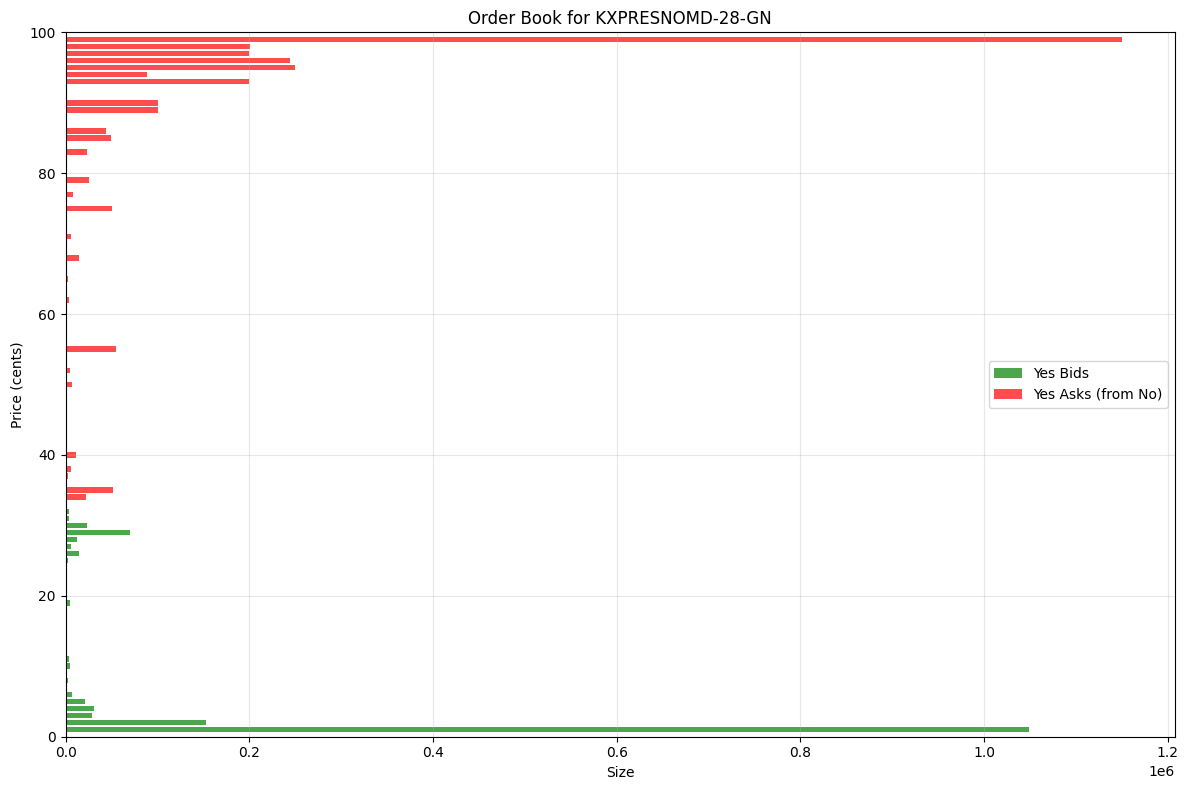


Order Book Summary for KXPRESNOMD-28-GN:
Yes Bids: 31 orders
No Bids (as Yes Asks): 43 orders
Best Yes Bid: 32¢
Best Yes Ask: 33¢
Spread: 1¢


In [21]:
# 
import matplotlib.pyplot as plt
import numpy as np

# Extract yes bids and no asks from the orderbook
yes_bids = order_book['orderbook'].get('yes', [])
no_bids = order_book['orderbook'].get('no', [])

# Convert to arrays for plotting
if yes_bids:
    yes_prices = [bid[0] for bid in yes_bids]
    yes_sizes = [bid[1] for bid in yes_bids]
else:
    yes_prices, yes_sizes = [], []

# Convert no bids to yes asks (100 - no_price)
if no_bids:
    no_as_yes_prices = [100 - bid[0] for bid in no_bids]
    no_as_yes_sizes = [bid[1] for bid in no_bids]
else:
    no_as_yes_prices, no_as_yes_sizes = [], []

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot yes bids (green bars going left from center)
if yes_bids:
    for price, size in zip(yes_prices, yes_sizes):
        ax.barh(price, size, height=0.8, color='green', alpha=0.7, label='Yes Bids' if price == yes_prices[0] else "")

# Plot no bids converted to yes asks (red bars going right from center)
if no_bids:
    for price, size in zip(no_as_yes_prices, no_as_yes_sizes):
        ax.barh(price, size, height=0.8, color='red', alpha=0.7, label='Yes Asks (from No)' if price == no_as_yes_prices[0] else "")

# Formatting
ax.set_xlabel('Size')
ax.set_ylabel('Price (cents)')
ax.set_title(f'Order Book for {market_ticker}')
ax.grid(True, alpha=0.3)

# Add legend
if yes_bids or no_bids:
    ax.legend()

# Set y-axis limits to show reasonable price range
if yes_prices or no_as_yes_prices:
    all_prices = yes_prices + no_as_yes_prices
    min_price = max(0, min(all_prices) - 5)
    max_price = min(100, max(all_prices) + 5)
    ax.set_ylim(min_price, max_price)

plt.tight_layout()
plt.show()

# Calculate spread
spread = None
best_yes_bid = max(yes_prices) if yes_prices else None
best_yes_ask = min(no_as_yes_prices) if no_as_yes_prices else None

if best_yes_bid is not None and best_yes_ask is not None:
    spread = best_yes_ask - best_yes_bid

# Print summary
print(f"\nOrder Book Summary for {market_ticker}:")
print(f"Yes Bids: {len(yes_bids)} orders")
print(f"No Bids (as Yes Asks): {len(no_bids)} orders")
if best_yes_bid is not None:
    print(f"Best Yes Bid: {best_yes_bid}¢")
if best_yes_ask is not None:
    print(f"Best Yes Ask: {best_yes_ask}¢")
if spread is not None:
    print(f"Spread: {spread}¢")


## Portfolio and trades

In [11]:
# Portfolio endpoints: Balance, Positions, Fills, Settlements
bal = portfolio.GetBalance()
pos = portfolio.GetPositions(limit=50)
fil = portfolio.GetFills(limit=20)
setl = portfolio.GetPortfolioSettlements(limit=20)

{"balance": bal, "positions_keys": list(pos.keys()), "fills_keys": list(fil.keys()), "settlements_keys": list(setl.keys())}


{'balance': {'balance': 195939},
 'positions_keys': ['cursor', 'market_positions', 'event_positions'],
 'fills_keys': ['fills', 'cursor'],
 'settlements_keys': ['settlements', 'cursor']}

In [12]:
import uuid

if constants.BASE_URL == constants.PROD_BASE_URL:
    raise Exception("DANGER: USING PROD")

# Place a limit buy for 1 contract at 20c Yes
order_response = portfolio.CreateOrder(
    ticker="KXPRESNOMD-28-GN",
    client_order_id=str(uuid.uuid4()),
    type="limit",      # "limit" or "market"
    action="buy",      # "buy" or "sell"
    side="yes",        # "yes" or "no"
    count=1,
    yes_price=20       # price in cents (0-100). Use 'no_price' instead if side="no"
)

order_response

{'order': {'order_id': '0c9acaab-7146-489e-9cb1-2b363fad291b',
  'user_id': 'fd531f2c-a9b1-4304-8b18-d43aed08fec0',
  'ticker': 'KXPRESNOMD-28-GN',
  'status': 'resting',
  'yes_price': 20,
  'no_price': 80,
  'yes_price_dollars': '0.2000',
  'no_price_dollars': '0.8000',
  'created_time': '2025-09-04T00:12:42.502342Z',
  'expiration_time': None,
  'self_trade_prevention_type': '',
  'action': 'buy',
  'side': 'yes',
  'type': 'limit',
  'client_order_id': '6c00eef5-26f2-4aa1-8966-7bda32f2bcd7',
  'order_group_id': ''}}